# Hypothesis

Null Hypothesis (H0): There is no significant difference in churn rates between customers with multiple lines and customers with a single line.

Alternate Hypothesis (HA): Customers with multiple lines have a lower churn rate compared to customers with a single line.

## Notebook overview

This notebook is a guide to start practicing Machine Learning.

## Questions
1. What factors contribute to higher churn rates among internet service customers?
2. Is there a relationship between receiving tech support and customer retention, considering the impact of price increases?
3. Does the presence of partners and dependants affect customer churn compared to customers without partners and dependants?
4. To what extent does an increase in charges on products influence customer churn?
5. How does an increase in monthly charges impact churn rates among senior citizens and non-senior citizens?
6. Does the duration of contracts influence customer retention?
7. Is there a correlation between customer tenure and churn rate?
8. How does the preference for paperless billing affect customer churn compared to non-paperless billing?

## Data and Library Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpathes
import seaborn as sns
import plotly.express as px
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
#from pandas_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import *
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [2]:
# For CSV, use pandas.read_csv
Customer_Data=pd.read_csv("C:/Users/danka/Desktop/DAP 14/LP3/Career_Accelerator_LP3-Classifcation\Telco-Customer-Churn.csv")

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [3]:
Customer_Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
Customer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Check Statistical Summary
Customer_Data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
Customer_Data.shape

(7043, 21)

In [7]:
Customer_Data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
Customer_Data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
Customer_Data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
#retrieve the unique values of the "InternetService" column in your customer data
Customer_Data.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [11]:
#retrieve the unique values of the "churn" column in your customer data
Customer_Data.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [12]:
#retrieve the unique values of the "DeviceProtection" column in your customer data
Customer_Data.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [13]:
#retrieve the unique values of the "TechSupport" column in your customer data
Customer_Data.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [14]:
#retrieve the unique values of the "SreamingTV" column in your customer data
Customer_Data.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [15]:
Customer_Data.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [16]:
Customer_Data.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [17]:
Customer_Data.PaperlessBilling  .unique()

array(['Yes', 'No'], dtype=object)

In [18]:
Customer_Data.PaymentMethod .unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [19]:
Customer_Data.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

## Pandas Profiling on Dataset

In [20]:
#profile = ProfileReport(Customer_Data)
#profile.to_widgets()

In [21]:
Customer_Data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Data Cleaning

In [22]:
Customer_Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
### dropping irrelevant columns
Customer_Data.drop(['customerID'],axis=1, inplace = True)
Customer_Data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
#changing the data type of the 'TotalCharges' column in your Customer_Data DataFrame to numeric.
Customer_Data['TotalCharges'] = pd.to_numeric(Customer_Data['TotalCharges'], errors='coerce').fillna(0, downcast='infer')
Customer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Finding total charges with values as 0s

In [25]:
# filter the Customer_Data DataFrame to retrieve rows where the 'TotalCharges' column is equal to 0.
Missing_Charges = Customer_Data[Customer_Data['TotalCharges'] == 0]
Missing_Charges.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No


In [26]:
#check the shape (number of rows and columns) 
Missing_Charges.shape

(11, 20)

In [27]:
#drop the rows from the Customer_Data DataFrame where the 'TotalCharges' column is equal to 0
Customer_Data.drop(Customer_Data[Customer_Data['TotalCharges'] == 0].index, inplace=True)
Customer_Data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Exploratory Data Analysis

In [28]:
#calculate the pairwise(the correlation coefficient between each pairs ) between columns of the Customer_Data DataFrame
Customer_Data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [29]:
#Include the matplotlib inline magic command
%matplotlib inline

<AxesSubplot:title={'center':'Correlation matrix for the Customer Data'}>

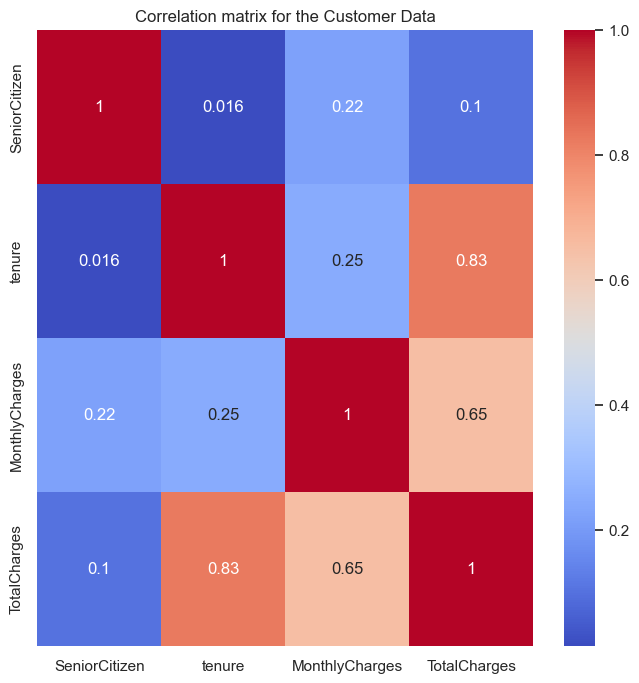

In [162]:
#creating a heatmap of the correlation matrix for the Customer_Data
sns.set(rc={'figure.figsize': (8, 8)})
plt.title('Correlation matrix for the Customer Data')
sns.heatmap(Customer_Data.corr(), annot=True, cmap="coolwarm")

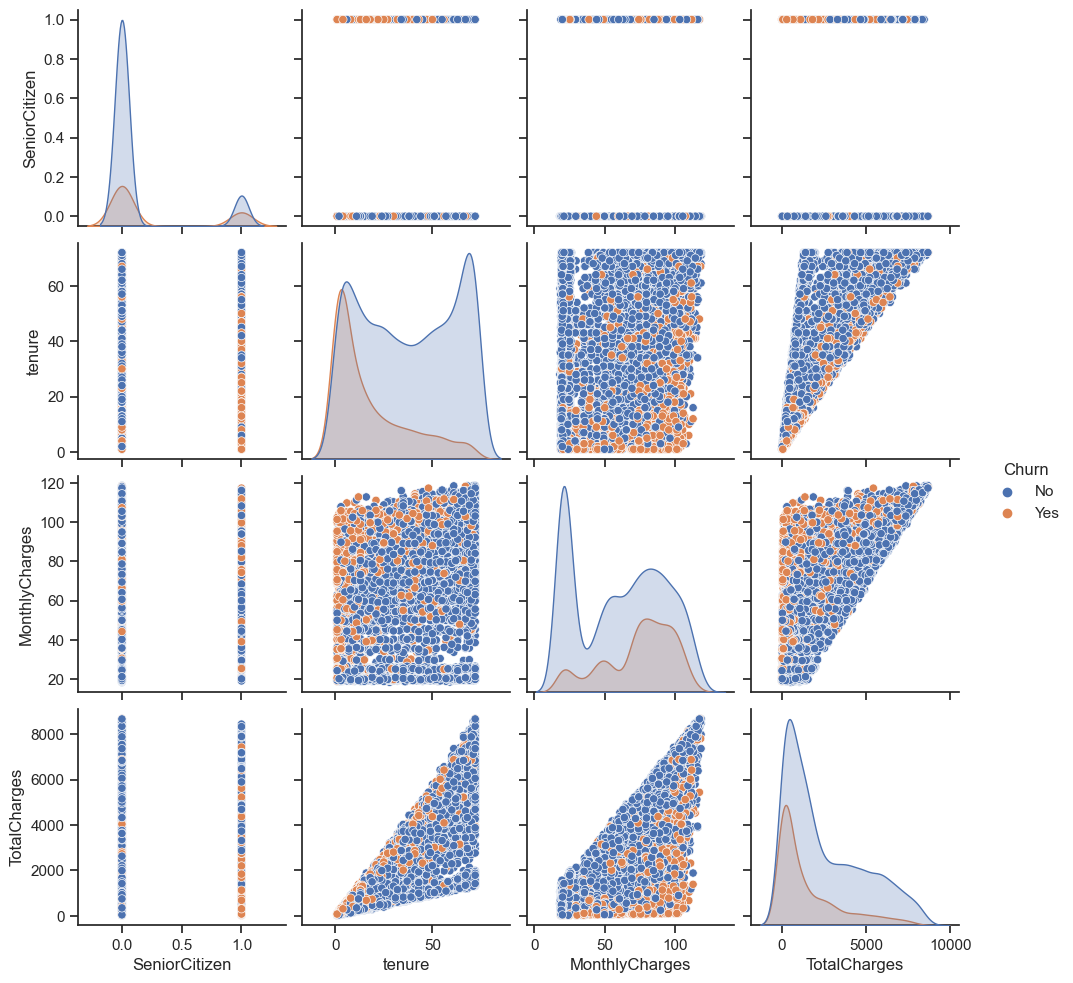

In [165]:
#visualizing the relationships between different variables in the Customer_Data DataFrame.
sns.set(style="ticks")
sns.pairplot(Customer_Data, hue="Churn")

In [32]:
Customer_Data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Checking Distribution of the target variable

In [33]:
#output will display the count of each unique value in the "Churn" column
Customer_Data["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Distribution of Churn Variable')

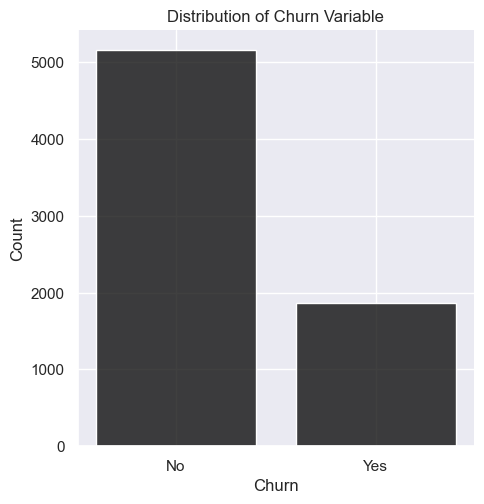

In [166]:
#visualize the distribution of the "Churn" variable
sns.set(rc={'figure.figsize': (15, 5)})
sns.displot(Customer_Data, x="Churn", shrink=.8, color="black")
plt.title('Distribution of Churn Variable')

## Checking for the distribution of the charges of the company 


Text(0.5, 1.0, 'Distribution of the MonthlyCharges variable')

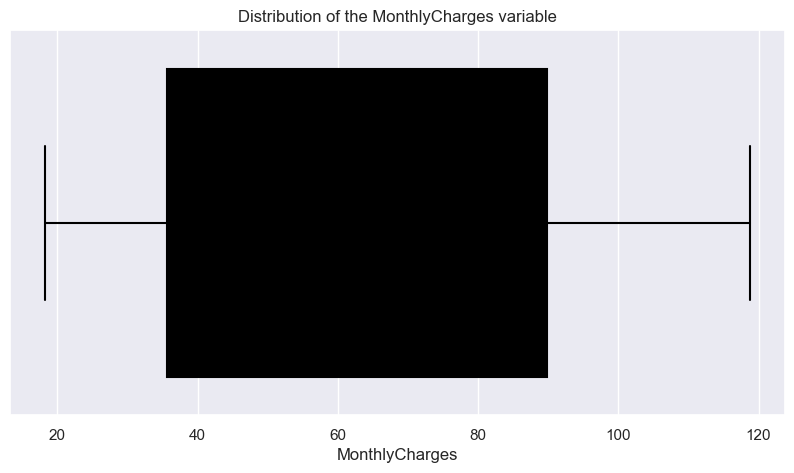

In [167]:
# The box plot provides information about the median, quartiles, and any potential outliers in the distribution of the "MonthlyCharges" variable.

sns.set(rc={'figure.figsize': (10, 5)})
sns.boxplot(Customer_Data['MonthlyCharges'],color='black' )
plt.title('Distribution of the MonthlyCharges variable')

Text(0.5, 1.0, 'Distribution of the Total charges variable')

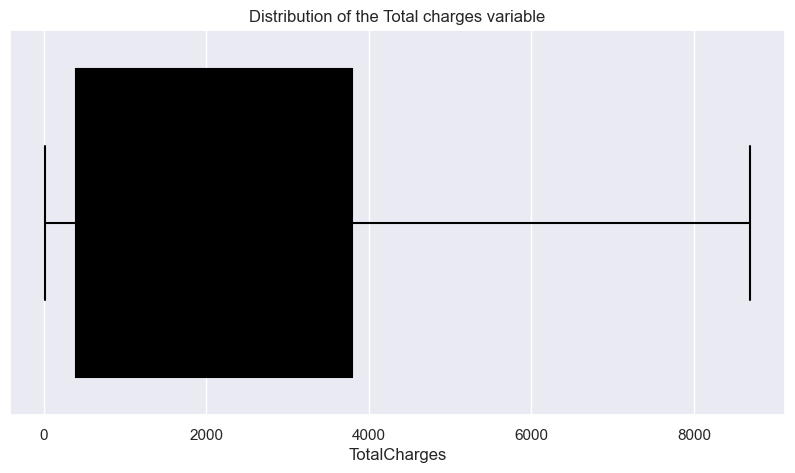

In [169]:
sns.set(rc={'figure.figsize': (10, 5)})
sns.boxplot(Customer_Data['TotalCharges'], color='black')
plt.title('Distribution of the Total charges variable')

## Distribution of the cartegorical columns

In [38]:
[col for col in Customer_Data.columns if Customer_Data[col].dtype=="O"]

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

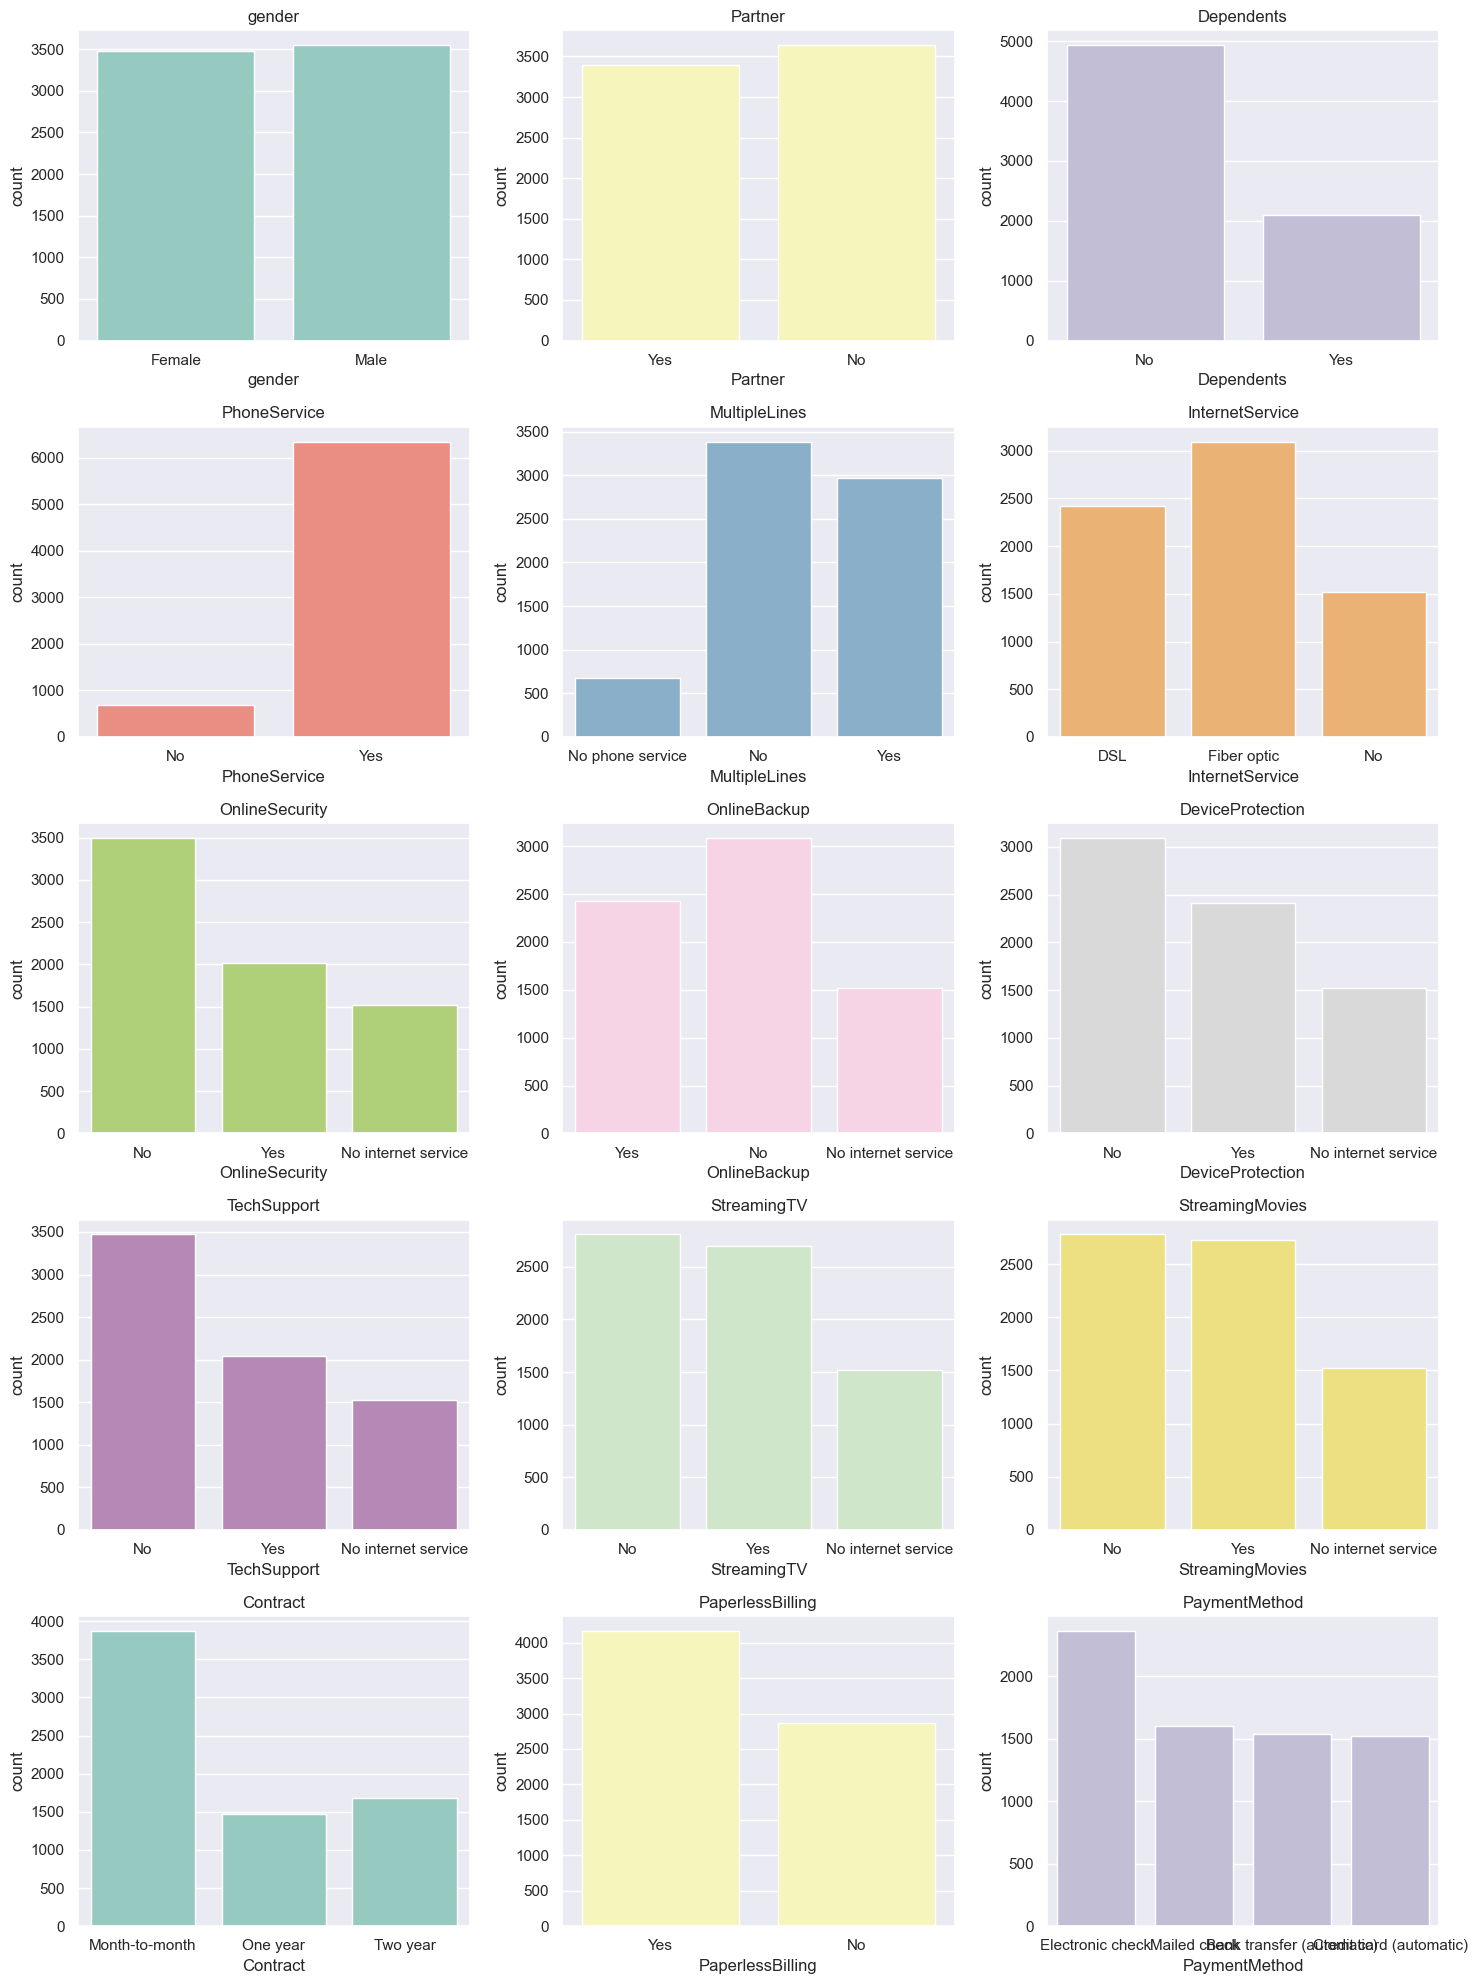

In [173]:
#generating bar plots for multiple categorical variables in the "Customer_Data" DataFrame

services = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

num_services = len(services)
num_rows = (num_services - 1) // 3 + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows*4))
color_palette = sns.color_palette("Set3", num_services)  # Define color palette

for i, item in enumerate(services):
    row = i // 3  # Calculate row index
    col = i % 3   # Calculate column index
    
    ax = axes[row, col]
    sns.countplot(data=Customer_Data, x=item, ax=ax, palette=[color_palette[i]])
    ax.set_title(item)

# Remove unused subplots
if num_services < num_rows * 3:
    for i in range(num_services, num_rows * 3):
        fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


## Q1 What factors contribute to higher churn rates among internet service customers?

In [40]:
import pandas as pd

Internet = Customer_Data['InternetService'].value_counts()
Internet_result = pd.DataFrame(Internet)

Internet_result = Internet_result.reset_index()
Internet_result.columns = ['InternetService', 'Total']

# Calculate the percentage
Internet_result['Percentage'] = (Internet_result['Total'] / Internet_result['Total'].sum()) * 100

Internet_result


,InternetService,Total,Percentage
0,Fiber optic,3096,44.027304
1,DSL,2416,34.357224
2,No,1520,21.615472


In [176]:
Internet = Customer_Data['InternetService'].value_counts()
Internet_result = pd.DataFrame(Internet)

fig = go.Figure(data=[go.Pie(labels=Internet_result.index, values=Internet_result['InternetService'])])
fig.show()

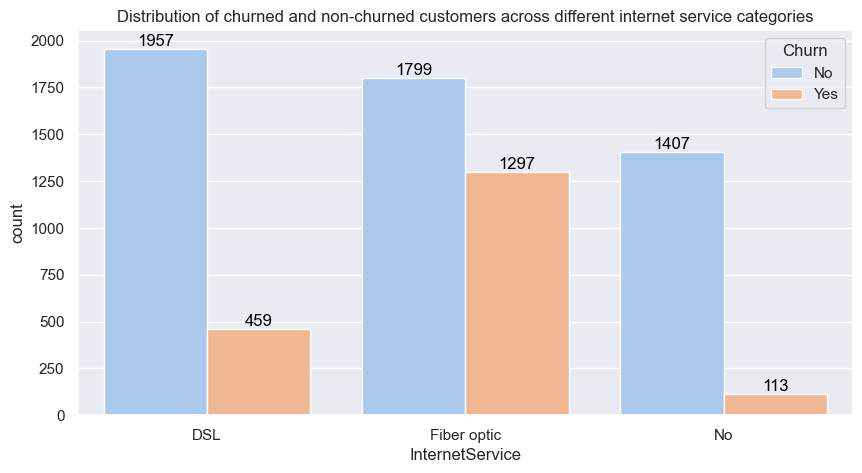

In [177]:
#showing the distribution of churned and non-churned customers across different internet service categories.

sns.set(rc={'figure.figsize': (10, 5)})

ax = sns.countplot(data=Customer_Data, x='InternetService', hue='Churn', palette="pastel")

for container in ax.containers:
    ax.bar_label(container, color='black')
plt.title('Distribution of churned and non-churned customers across different internet service categories')
plt.show()

Based on the plots, it can be observed that the majority of customers (44%) are subscribed to the Fibre Optic internet service, followed by 34% on DSL, and 21.6% without any internet service. Interestingly, the Fibre Optic internet service has the highest churn rate, despite having the highest number of customers. Specifically, out of the customers who churned, 1297 were using the Fibre Optic service, 459 were on DSL, and 113 had no internet service.

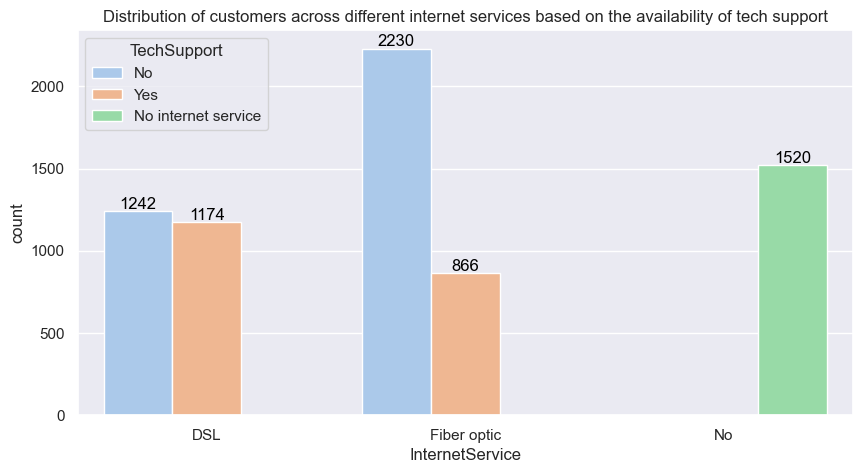

In [178]:
#display the countplot with bar labels showing the distribution of customers across different internet services based on the availability of tech support.
sns.set(rc={'figure.figsize': (10, 5)})

ax = sns.countplot(data=Customer_Data, x='InternetService', hue='TechSupport', palette="pastel")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', color='black')

plt.title('Distribution of customers across different internet services based on the availability of tech support')
plt.show()


Upon further analysis, it is evident that a significant number of customers who are subscribed to the Fibre Optic internet service do not have access to tech support. This finding suggests that the high churn rate among Fibre Optic customers could potentially be attributed to inadequate service quality or support.






## Q2 Is there a relationship between receiving tech support and customer retention, considering the impact of price increases?

In [44]:
Customer_Data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


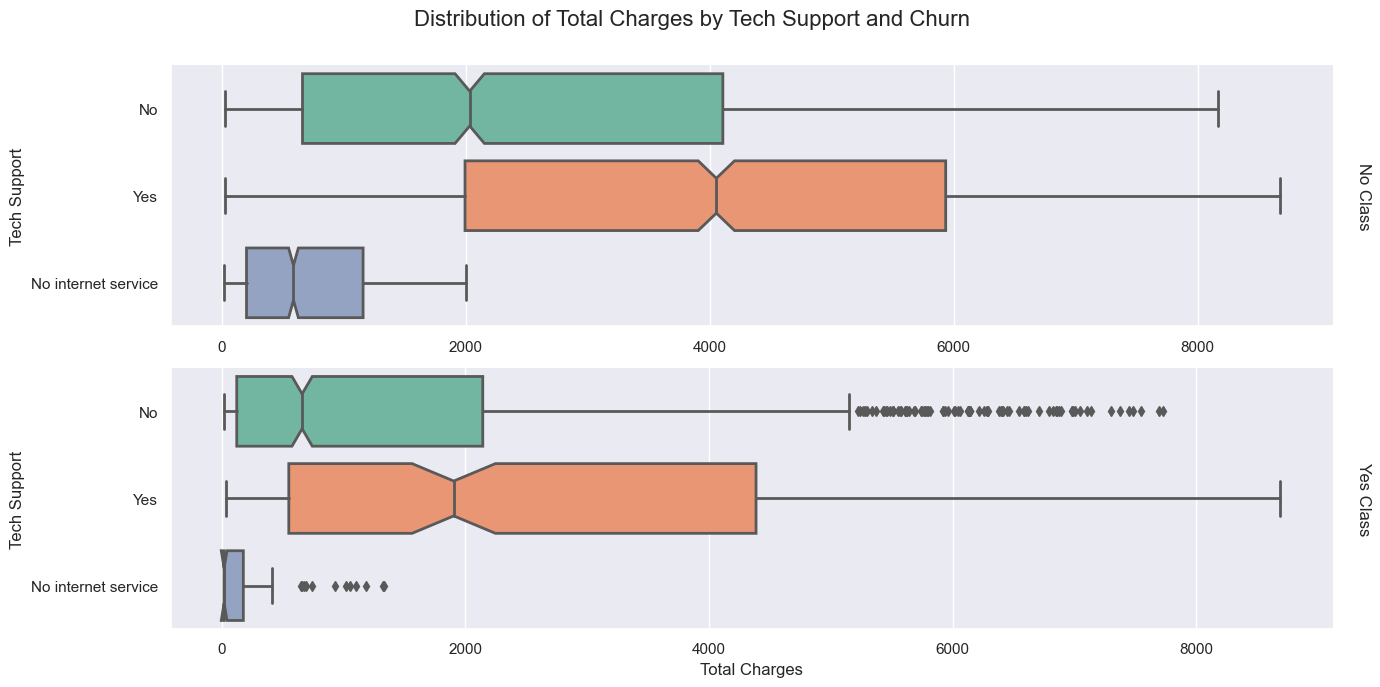

In [45]:
#distribution of "TotalCharges" for each level of "TechSupport"
g = sns.catplot(
    data=Customer_Data,
    x="TotalCharges", y="TechSupport", row="Churn",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=3.5, aspect=4, legend=False,
    palette="Set2", linewidth=2, notch=True
)

g.set_axis_labels("Total Charges", "Tech Support")
g.set_titles(row_template="{row_name} Class")

# Additional customization
plt.suptitle("Distribution of Total Charges by Tech Support and Churn", fontsize=16)
plt.subplots_adjust(top=0.9)

plt.show()

The plot indicates that customers who receive tech support are more likely to be retained, even if there is an increase in charges. The number of customers in the "No churn" class is higher compared to the "Yes churn" class, mainly because they have access to tech support despite the increased charges. Therefore, based on the plot, Vodafone can potentially retain customers from churning by offering better services and adjusting the charges, as customers are willing to pay more for quality services.

## Q3 Does the presence of partners and dependants affect customer churn compared to customers without partners and dependants?


Text(0.5, 1.0, 'Distribution of customers based on the Partner feature')

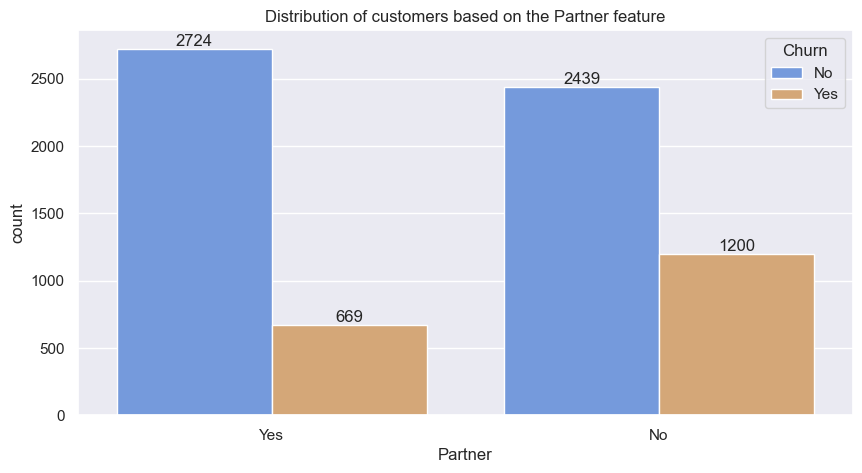

In [179]:
 #visualize the distribution of customers based on the "Partner" feature, with the hue representing the "Churn" status.
    
sns.set(rc={'figure.figsize': (10, 5)})

# Define custom colors
custom_colors = ["#6495ED", "#E3A869"]

ax = sns.countplot(data=Customer_Data, x='Partner', hue='Churn', palette=custom_colors)

for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of customers based on the Partner feature')


Text(0.5, 1.0, 'Distribution of customers based on the Dependent feature')

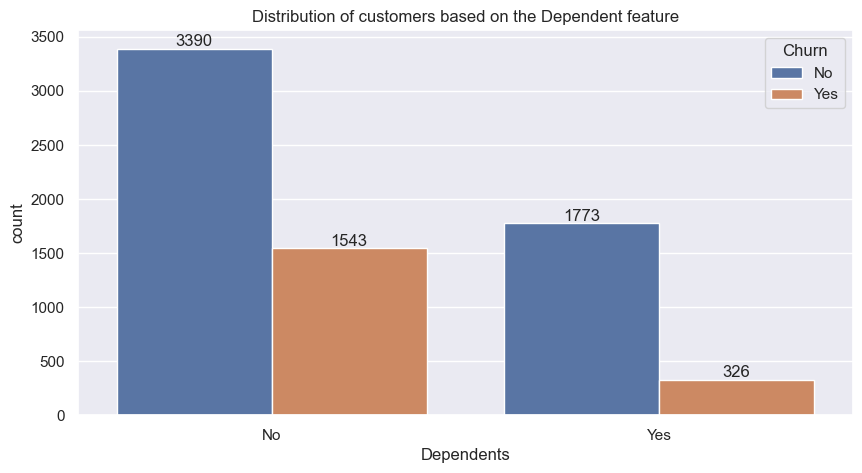

In [180]:
sns.set(rc = {'figure.figsize':(10,5)})
ax = sns.countplot(data= Customer_Data, x='Dependents', hue='Churn')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of customers based on the Dependent feature')

Based on the plots, it is observed that customers without partners and dependents have a higher churn rate compared to those with partners and dependents. Specifically, 1200 customers without partners and 1543 customers without dependents churned, while only 669 customers with partners and 326 customers with dependents churned.

In other words, the absence of partners and dependents appears to be associated with a higher likelihood of churn, as indicated by the larger number of customers in those categories who decided to discontinue their services.


## Q4 To what extent does an increase in charges on products influence customer churn?


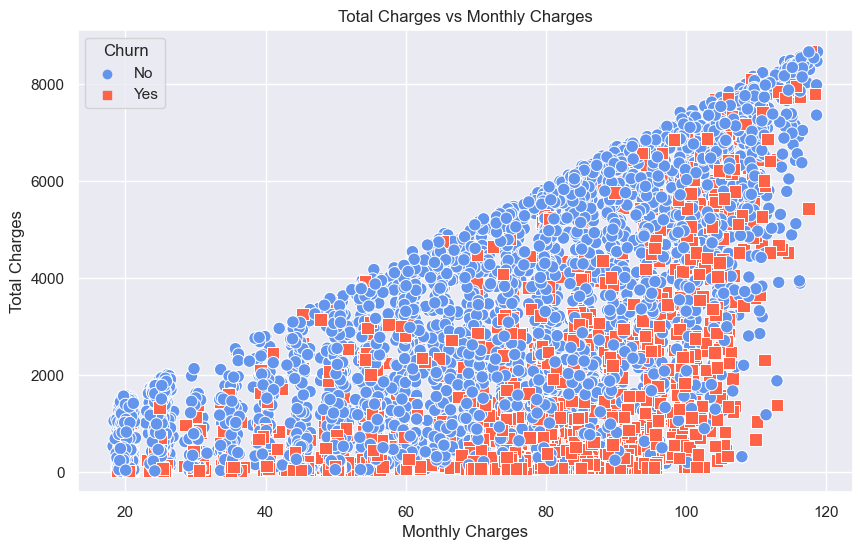

In [48]:
#box plot displays the distribution of "TotalCharges" for each churn category, showing the median, quartiles, and any outliers.
import seaborn as sns

sns.set(rc={'figure.figsize': (10, 6)})

# Custom color palette
custom_palette = ["#6495ED", "#FF6347"]

# Custom marker styles
churn_markers = ["o", "s"]

# Custom scatter plot
ax = sns.scatterplot(data=Customer_Data, y="TotalCharges", x="MonthlyCharges", hue="Churn",
                     palette=custom_palette, style="Churn", markers=churn_markers, s=80)

# Set title and axes labels
ax.set_title("Total Charges vs Monthly Charges")
ax.set_xlabel("Monthly Charges")
ax.set_ylabel("Total Charges")

# Customize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Churn", loc="best")

# Show


Majority of customers who churn with rest to charges churned more as the charges increased

## Q5 How does an increase in monthly charges impact churn rates among senior citizens and non-senior citizens?


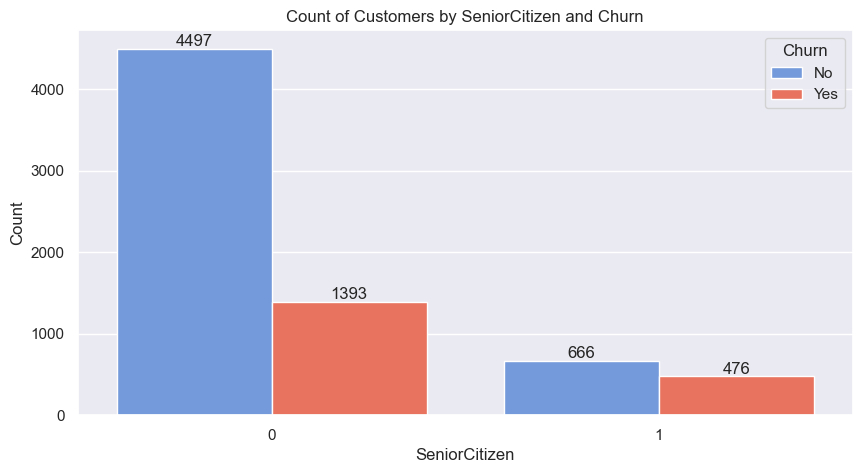

In [49]:

sns.set(rc={'figure.figsize': (10, 5)})

# Custom color palette
custom_palette = ["#6495ED", "#FF6347"]

# Custom bar graph
ax = sns.countplot(data=Customer_Data, x='SeniorCitizen', hue='Churn', palette=custom_palette)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

# Set title and axes labels
ax.set_title("Count of Customers by SeniorCitizen and Churn")
ax.set_xlabel("SeniorCitizen")
ax.set_ylabel("Count")

# Customize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Churn", loc="best")

# Show the plot
plt.show()


In [50]:
# Visualizing the distribution of categories inside the column
fig = px.box(Customer_Data, y= 'MonthlyCharges', x="SeniorCitizen", color="Churn", labels= {"color": "Churned",
                                                   "SeniorCitizen": "Senior Citizen",
                                                   "MonthlyCharges": "Monthly Charges (USD)",
                                                   "TotalCharges": "Total Charges (USD)"
                                                  },
             title=f"A visual representation of values in the monthly charges column"
            )
fig.show()

In [51]:

Does the duration of contracts influence customer retention?
Is there a correlation between customer tenure and churn rate?
How does the preference for paperless billing affect customer churn compared to non-paperless billing?

Object `retention` not found.
Object `rate` not found.
Object `billing` not found.


## Feature Engineering

In [52]:
Customer_Data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
Category =[col for col in Customer_Data.columns if Customer_Data[col].dtype=="O"]
Category

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [54]:
 #remove the specified columns from the DataFrame
new_df = Customer_Data.drop(['MonthlyCharges','TotalCharges','tenure'],axis=1)

In [55]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [56]:
#dropping the column churn
new_df.drop(['Churn'],axis=1, inplace = True)
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [57]:
#initializing an instance of the OneHotEncoder class with certain parameters
Encoded = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')

In [58]:
transformer = make_column_transformer(
    (Encoded, ['gender','Partner','Dependents','PhoneService','MultipleLines',
                          'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                         'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
                        'PaymentMethod']),   
    remainder='passthrough',)

In [59]:
#fit the transformer on the new_df dataset and transforms it
X_train_encoded = transformer.fit_transform(new_df)
X_train_encoded = pd.DataFrame(
    X_train_encoded, 
    columns=transformer.get_feature_names_out())

In [60]:
X_train_encoded

,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,...,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7028,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7029,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7030,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [61]:
#accessing the unique values of the encoded feature "gender_Male" in the X_train_encoded
X_train_encoded.onehotencoder__gender_Male.unique()

array([0., 1.])

In [62]:
#concatenating the original Customer_Data DataFrame with the encoded and transformed X_train_encoded DataFrame
whole_set =pd.concat([Customer_Data.reset_index(drop = True), X_train_encoded], axis = 1)
whole_set

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [63]:
whole_set.drop(['gender','Partner','Dependents','PhoneService','MultipleLines',
                          'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                         'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
                        'PaymentMethod'],axis=1, inplace = True)
whole_set.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No phone service,...,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen
0,0,1,29.85,29.85,No,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,No,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,Yes,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,45,42.30,1840.75,No,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,Yes,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [64]:
#applying label encoding to the 'Churn' column in the whole_set DataFrame using the LabelEncoder() function from the preprocessing module.
le = preprocessing.LabelEncoder()
whole_set['Churn'] = le.fit_transform(whole_set.Churn)
whole_set.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No phone service,...,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen
0,0,1,29.85,29.85,0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,45,42.30,1840.75,0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [65]:
# Looking at the correlation between the variables in the merged dataframe
correlation = pd.DataFrame(whole_set.corr())
colorscale=[[0.0, 'rgb(255,255,255)'], [0.2, 'rgb(255, 255, 153)'],
            [0.4, 'rgb(153, 255, 204)'], [0.6, 'rgb(179, 217, 255)'],
            [0.8, 'rgb(240, 179, 255)'],[1.0, 'rgb(255, 77, 148)']]
fig = px.imshow(correlation,
                text_auto = ".4f",
                aspect = "auto",
                labels = {"color":"Correlation Coefficient"},
                contrast_rescaling = "minmax",
                color_continuous_scale= colorscale #["#fa4b3e", "#f5dd53", "#228B22"]
               )
fig.update_xaxes(side="top")
fig.show()

In [66]:
whole_set.isnull().sum()


SeniorCitizen                                           0
tenure                                                  0
MonthlyCharges                                          0
TotalCharges                                            0
Churn                                                   0
onehotencoder__gender_Male                              0
onehotencoder__Partner_Yes                              0
onehotencoder__Dependents_Yes                           0
onehotencoder__PhoneService_Yes                         0
onehotencoder__MultipleLines_No phone service           0
onehotencoder__MultipleLines_Yes                        0
onehotencoder__InternetService_Fiber optic              0
onehotencoder__InternetService_No                       0
onehotencoder__OnlineSecurity_No internet service       0
onehotencoder__OnlineSecurity_Yes                       0
onehotencoder__OnlineBackup_No internet service         0
onehotencoder__OnlineBackup_Yes                         0
onehotencoder_

#         Train Test split


In [67]:
# Splitting the dataframe into features (X) and target variable (y)
y = whole_set["Churn"]
X = whole_set.drop(columns=["Churn"])

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24, stratify=y)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)





X_train shape: (5274, 31)
y_train shape: (5274,)
X_test shape: (1758, 31)
y_test shape: (1758,)


In [68]:
# Putting the training dataset together for modeling
train_data = pd.concat([X_train, y_train], axis=1)
train_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,...,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,Churn
3996,0,38,20.30,743.05,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
3726,0,23,77.15,1759.40,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
3246,1,37,106.75,4056.75,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
260,1,3,41.15,132.20,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
4377,0,21,20.35,422.70,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [69]:
train_data.shape

(5274, 32)

In [70]:
# Putting the test dataset together for modeling
test_data = pd.concat([X_test, y_test], axis=1)
test_data.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,...,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,Churn
4712,1,64,102.10,6688.10,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
5934,0,1,84.85,84.85,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
6163,0,10,70.10,659.65,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
5758,0,65,59.80,3808.20,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0
212,0,61,19.75,1124.20,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


# SCALING THE NUMERIC COLUMNS

In [71]:
# Create the MinMaxScaler object
scaler = MinMaxScaler()

# Select the columns to be scaled
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply the scaling to the selected columns in the train_data dataframe
train_data[cols_to_scale] = scaler.fit_transform(train_data[cols_to_scale])


In [72]:
# Select the columns to be scaled
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a new DataFrame to store the scaled values
scaled_test_data = test_data.copy()

# Create the MinMaxScaler object
scaler = MinMaxScaler()

# Apply the scaling to the selected columns in the scaled_test_data DataFrame
scaled_test_data[cols_to_scale] = scaler.fit_transform(test_data[cols_to_scale])

# Display the scaled test data
scaled_test_data.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,...,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,Churn
4712,1,0.887324,0.833583,0.770687,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
5934,0,0.000000,0.661169,0.007610,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
6163,0,0.126761,0.513743,0.074034,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
5758,0,0.901408,0.410795,0.437883,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0
212,0,0.845070,0.010495,0.127718,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


#                   Modelling

In [73]:
count_not_churned, count_churned = train_data["Churn"].value_counts()
count_not_churned, count_churned

(3872, 1402)

In [74]:
count_churned

1402

# OVERSAMPLING SMOTE BALANCING

In [75]:
# Import the necessary libraries:
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(random_state=24)

# Apply SMOTE to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the balanced class distribution
y_train_resampled.value_counts()


0    3872
1    3872
Name: Churn, dtype: int64

In [76]:

# Splitting the resampled data into train and test sets
sm_X_train, sm_X_test, sm_y_train, sm_y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, 
                                                                random_state=15, stratify=y_train_resampled)


# Logistic Regression

In [77]:
# Logistic Regression model
log_reg = LogisticRegression(random_state=20)
log_reg_model = log_reg.fit(sm_X_train, sm_y_train)


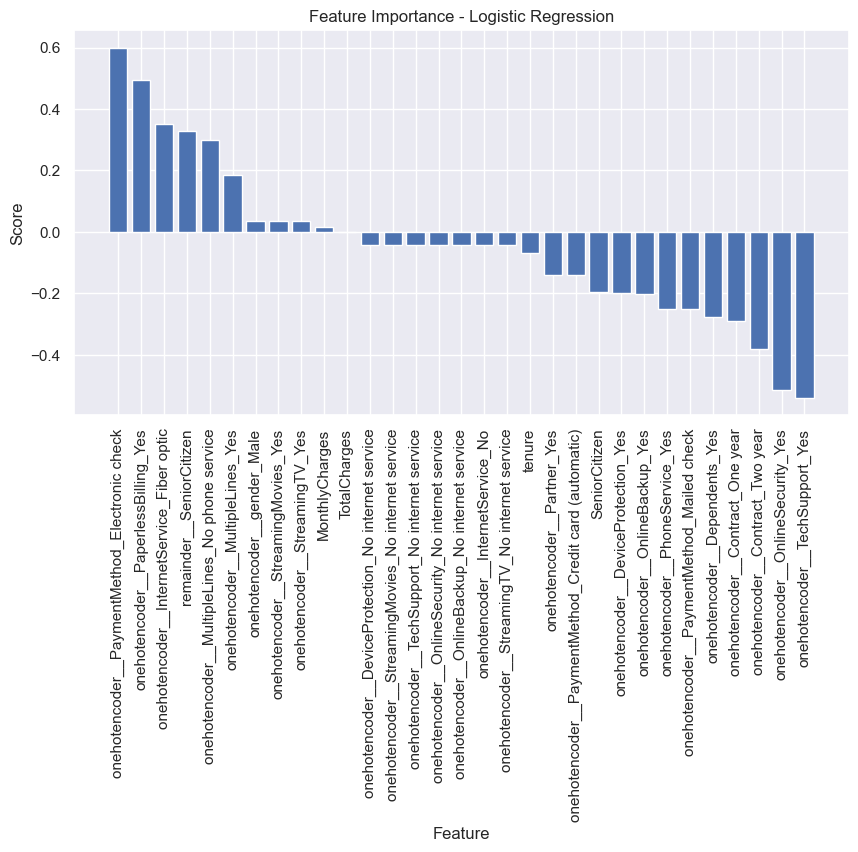

In [78]:

# Calculate feature importance
log_reg_importance = pd.DataFrame(log_reg_model.coef_[0], index=X.columns)
log_reg_importance.reset_index(inplace=True)
log_reg_importance.rename(columns={"index": "Feature", 0: "Score"}, inplace=True)
log_reg_importance.sort_values(by="Score", ascending=False, inplace=True)

# Create bar plot
plt.figure(figsize=(10, 5))
plt.bar(log_reg_importance["Feature"], log_reg_importance["Score"])
plt.xlabel("Feature")
plt.ylabel("Score")
plt.title("Feature Importance - Logistic Regression")
plt.xticks(rotation=90)
plt.show()


In [79]:
y_pred = log_reg.predict(sm_X_test)
y_true = sm_y_test

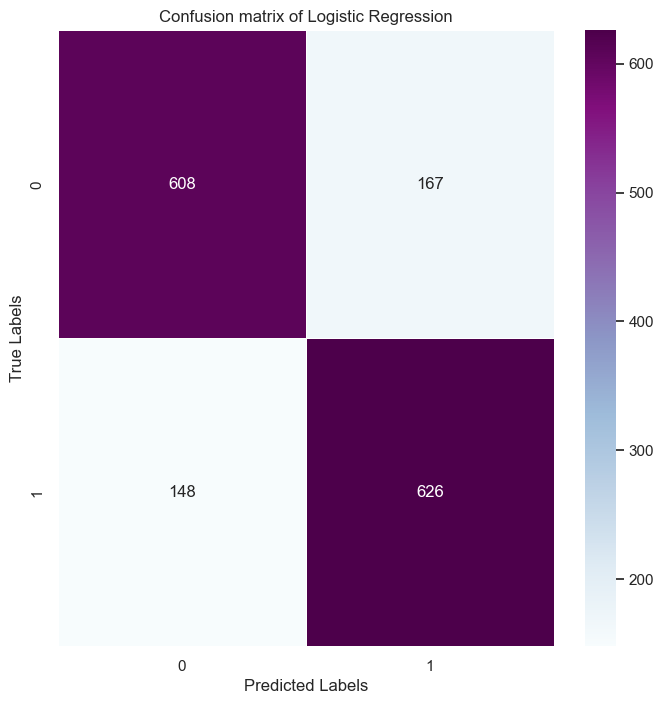

In [222]:
cm_lr = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm_lr, annot=True, linewidth=0.5, fmt=".0f", cmap='BuPu', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.title('Confusion matrix of Logistic Regression')
plt.show()


In [81]:
# Evaluating the model
smote_report = classification_report(sm_y_test, y_pred, target_names= ["Stayed", "Churned"])
print(smote_report)

              precision    recall  f1-score   support

      Stayed       0.80      0.78      0.79       775
     Churned       0.79      0.81      0.80       774

    accuracy                           0.80      1549
   macro avg       0.80      0.80      0.80      1549
weighted avg       0.80      0.80      0.80      1549



In [82]:
fbeta_score(y_true, y_pred, average='binary', beta= 0.9)

0.7979632942236996

# Random Forest

In [83]:
rf_smote = RandomForestClassifier(random_state = 24)
rf_smote = rf_smote.fit(sm_X_train, sm_y_train)

In [84]:
## Feature Importance of the Random Forest Model
rf_importance = pd.DataFrame({'Feature': X.columns, 'Score': rf_smote.feature_importances_})
rf_importance = rf_importance.sort_values(by='Score', ascending=False)

fig = px.bar(rf_importance, x='Feature', y='Score')
fig.show()


In [85]:
rfsmote_pred = rf_smote.predict(sm_X_test)
rf_true = sm_y_test

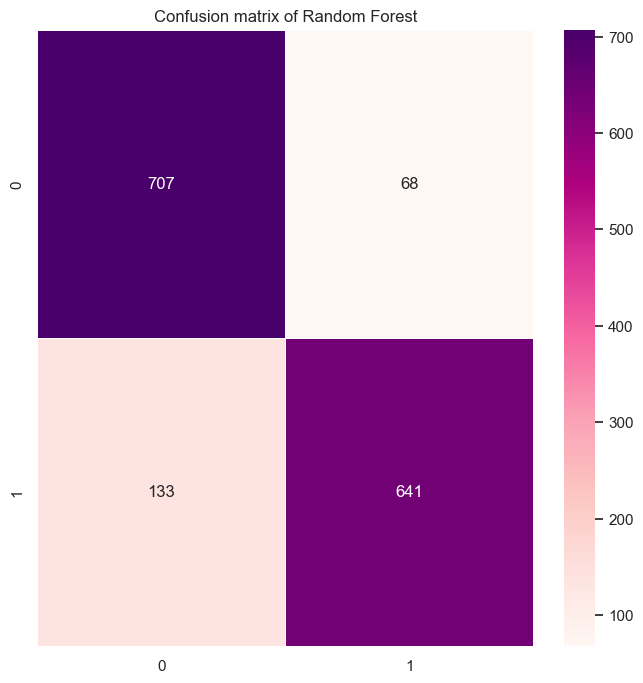

In [221]:
rfsmote = confusion_matrix(sm_y_test,rfsmote_pred)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(rfsmote, annot=True, linewidth=0.5, fmt=".0f",cmap='RdPu',ax = ax)
plt.xlabel = ('rfsmote_pred')
plt.ylabel = ('rf_true')
plt.title('Confusion matrix of Random Forest')
plt.show()

In [87]:
# Evaluating the model
smote_report = classification_report(sm_y_test,rfsmote_pred, target_names= ["Stayed", "Churned"])
print(smote_report)

              precision    recall  f1-score   support

      Stayed       0.84      0.91      0.88       775
     Churned       0.90      0.83      0.86       774

    accuracy                           0.87      1549
   macro avg       0.87      0.87      0.87      1549
weighted avg       0.87      0.87      0.87      1549



In [88]:
#calculating the F-beta score for the binary classification problem using the random forest model predictions (rfsmote_pred) and true labels (y_true)
fbeta = fbeta_score(y_true, rfsmote_pred, average='binary', beta=0.9)
print(f"F-beta score: {fbeta}")

F-beta score: 0.8684596613620372


# ADABOOST

In [89]:
ADAB = AdaBoostClassifier(random_state=20)
ADAB.fit(sm_X_train, sm_y_train)


AdaBoostClassifier(random_state=20)

In [90]:
ADAB_pred =ADAB.predict(sm_X_test)
ADAB_true = sm_y_test

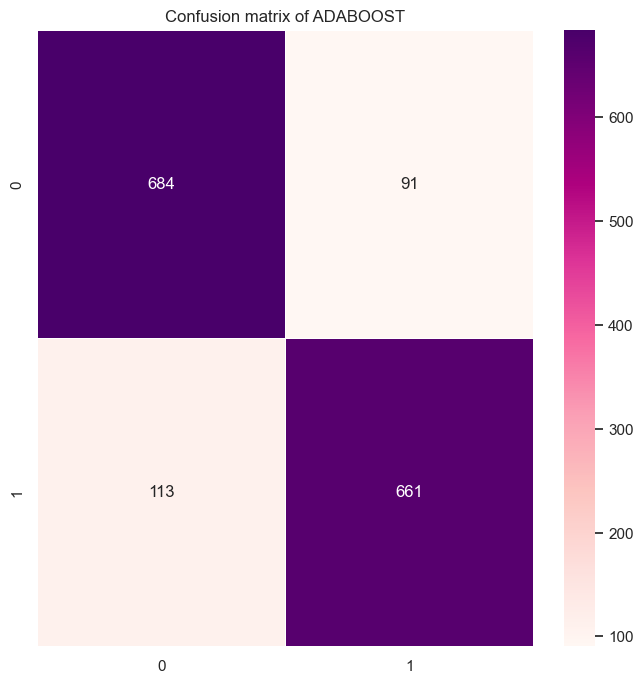

In [220]:
ADABsmote = confusion_matrix(sm_y_test,ADAB_pred)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(ADABsmote, annot=True, linewidth=0.5, fmt=".0f",cmap='RdPu',ax = ax)
plt.xlabel = ('ADAB_pred')
plt.ylabel = ('ADAB_true')
plt.title('Confusion matrix of ADABOOST')
plt.show()


In [92]:
# Evaluating the model
smote_report = classification_report(sm_y_test,ADAB_pred, target_names= ["Stayed", "Churned"])
print(smote_report)

              precision    recall  f1-score   support

      Stayed       0.86      0.88      0.87       775
     Churned       0.88      0.85      0.87       774

    accuracy                           0.87      1549
   macro avg       0.87      0.87      0.87      1549
weighted avg       0.87      0.87      0.87      1549



In [93]:
fbeta = fbeta_score(y_true, ADAB_pred, average='binary', beta=0.9)

print(f"F-beta score: {fbeta}")


F-beta score: 0.867630208711039


# K-NEAREST NEIGHBOURS

In [94]:
knn = KNeighborsClassifier(n_neighbors = 5, \
                           metric = 'minkowski', p = 2
                          )
SMknn_model = knn.fit(sm_X_train, sm_y_train)

In [95]:
knn_pred =knn.predict(sm_X_test)
knn_true = sm_y_test

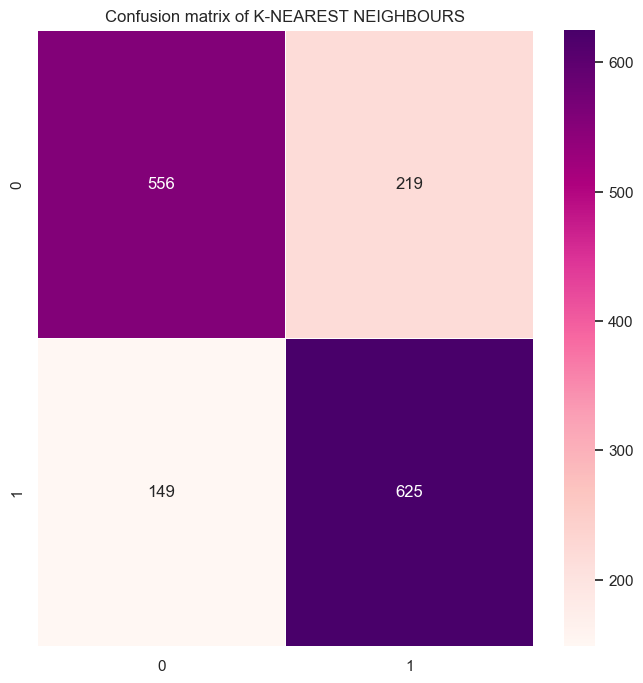

In [219]:
sm_knn = confusion_matrix(knn_true,knn_pred)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(sm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='RdPu',ax = ax)
plt.xlabel = ('knn_pred')
plt.ylabel = ('knn_true')
plt.title('Confusion matrix of K-NEAREST NEIGHBOURS')
plt.show()

In [97]:
smote_report = classification_report(sm_y_test,knn_pred, target_names= ["Stayed", "Churned"])
print(smote_report)

              precision    recall  f1-score   support

      Stayed       0.79      0.72      0.75       775
     Churned       0.74      0.81      0.77       774

    accuracy                           0.76      1549
   macro avg       0.76      0.76      0.76      1549
weighted avg       0.76      0.76      0.76      1549



In [98]:
fbeta_score(y_true, knn_pred, average='binary', beta= 0.9)
print(f"F-beta score: {fbeta}")


F-beta score: 0.867630208711039


# DECISION TREE

In [99]:
Sm_DT = DecisionTreeClassifier(random_state = 20)
SmDT_model = Sm_DT.fit(sm_X_train, sm_y_train)


In [100]:
## Feature importances
SmDT_importance = SmDT_model.feature_importances_
SmDT_importance = pd.DataFrame(SmDT_importance, columns = ["score"]).reset_index()
SmDT_importance["Feature"] = list(X.columns)
SmDT_importance.drop(columns = ["index"], inplace = True)
SmDT_importance.sort_values(by = "score", ascending = False, ignore_index=True, inplace = True)



## Plotting the feature importances
fig = px.bar(SmDT_importance, x = "Feature", y = "score")
fig.show()

In [101]:
SmDT_pred = SmDT_model.predict(sm_X_test)
SmDT_true = sm_y_test


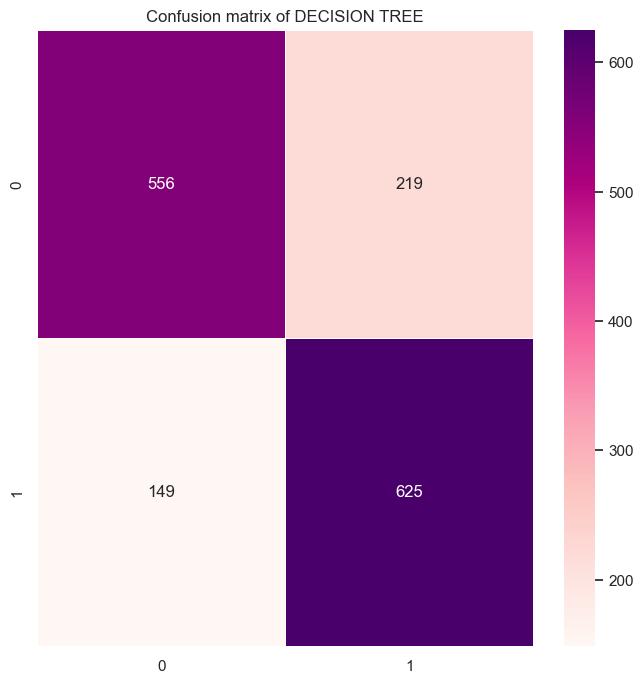

In [218]:
SmDT = confusion_matrix(SmDT_true, SmDT_pred)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(sm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='RdPu',ax = ax)
plt.xlabel = ('SmDT_pred')
plt.ylabel = ('SmDT_true ')
plt.title('Confusion matrix of DECISION TREE')
plt.show()


In [103]:
smote_report = classification_report(sm_y_test,SmDT_pred, target_names= ["Stayed", "Churned"])
print(smote_report)

              precision    recall  f1-score   support

      Stayed       0.81      0.83      0.82       775
     Churned       0.83      0.81      0.82       774

    accuracy                           0.82      1549
   macro avg       0.82      0.82      0.82      1549
weighted avg       0.82      0.82      0.82      1549



In [104]:
fbeta_score(y_true, SmDT_pred, average='binary', beta= 0.9)
print(f"F-beta score: {fbeta}")

F-beta score: 0.867630208711039


# MULTICOLLINEARITY TEST WITH Variance Inflation Factor (VIF)

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = whole_set.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(whole_set.values, i) for i in range(len(whole_set.columns))]

# Display the VIF DataFrame
print(vif_data)


                                              Feature          VIF
0                                       SeniorCitizen          inf
1                                              tenure     7.601061
2                                      MonthlyCharges   866.100958
3                                        TotalCharges    10.883913
4                                               Churn     1.396760
5                          onehotencoder__gender_Male     1.002126
6                          onehotencoder__Partner_Yes     1.462989
7                       onehotencoder__Dependents_Yes     1.382213
8                     onehotencoder__PhoneService_Yes  1774.603920
9       onehotencoder__MultipleLines_No phone service    60.960500
10                   onehotencoder__MultipleLines_Yes     7.295768
11         onehotencoder__InternetService_Fiber optic   148.578927
12                  onehotencoder__InternetService_No          inf
13  onehotencoder__OnlineSecurity_No internet service         

To improve the model performance and avoid multicollinearity issues, it is recommended to drop the 'MonthlyCharges' and 'TotalCharges' variables from the analysis. These variables have VIF scores higher than 10, indicating a high level of multicollinearity. By removing them, we can assess the model's performance without the influence of these correlated variables.

In [106]:
train_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,...,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,Churn
3996,0,0.521127,0.020418,0.083574,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
3726,0,0.309859,0.586653,0.200854,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
3246,1,0.507042,0.881474,0.465953,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
260,1,0.028169,0.228088,0.013086,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
4377,0,0.281690,0.020916,0.046607,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [107]:
train_data.drop(['onehotencoder__PhoneService_Yes'], axis=1, inplace = True)

In [108]:
train_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_Fiber optic,...,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,Churn
3996,0,0.521127,0.020418,0.083574,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
3726,0,0.309859,0.586653,0.200854,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
3246,1,0.507042,0.881474,0.465953,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
260,1,0.028169,0.228088,0.013086,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
4377,0,0.281690,0.020916,0.046607,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,0,0.169014,0.017430,0.028808,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
2649,0,0.000000,0.722112,0.008303,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
5989,0,0.661972,0.017928,0.117378,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0
2480,0,0.183099,0.619522,0.121532,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1


In [109]:
X = train_data.drop('Churn',axis='columns')
y = train_data['Churn']

In [110]:
smote2 = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    3872
1    3872
Name: Churn, dtype: int64

In [111]:
sm1_X_train, sm1_X_test, sm1_y_train, sm1_y_test = train_test_split(X_sm, y_sm, test_size=0.2, 
                                                    random_state=15, stratify=y_sm)

In [112]:
sm1_X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_Fiber optic,...,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen
2567,0,0.478873,0.837649,0.416259,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.0,0.0
2516,0,0.056338,0.561753,0.042101,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,0.0,0.0
7445,0,0.000000,0.517828,0.005936,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,0.0,0.0
2747,0,0.042254,0.606574,0.034439,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,1.000000,0.0,0.0
74,0,0.000000,0.264442,0.003000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6865,0,0.000000,0.276468,0.003140,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.572082,0.427918,0.0,0.0
5445,0,0.091742,0.624650,0.069103,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.581049,0.0,0.0
3304,0,0.084507,0.611554,0.067609,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.0,0.0
3811,0,0.422535,0.608068,0.284468,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,1.0,0.0


# Decision Tree model (without PhoneService)

In [113]:
Sm_DT2 = DecisionTreeClassifier()
SmDT2_model = Sm_DT2.fit(sm1_X_train, sm1_y_train)

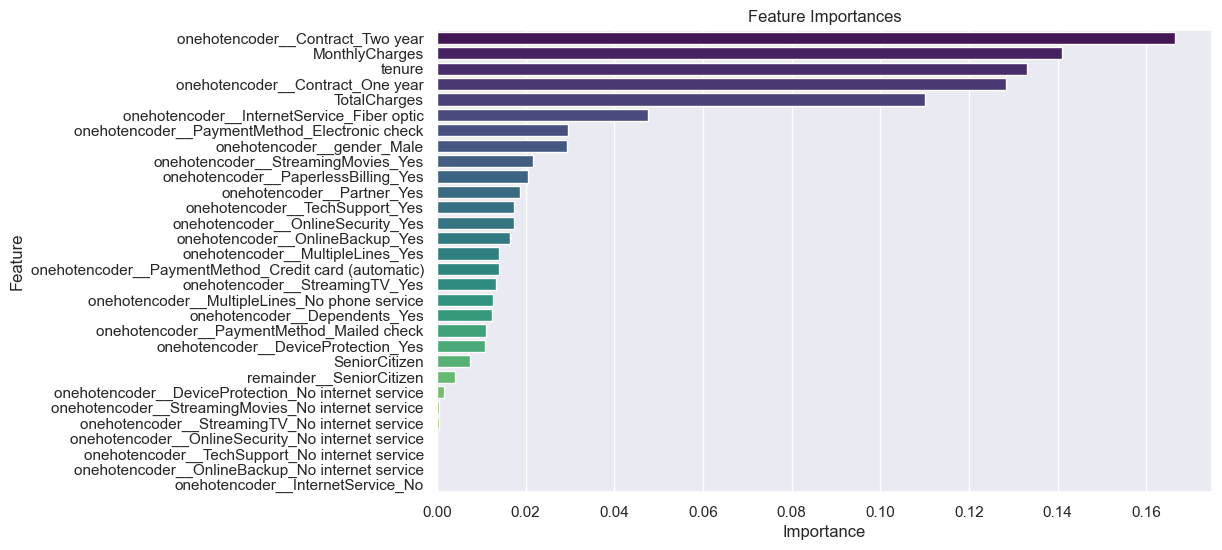

In [114]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': SmDT2_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
  # Make sure plt.xlabel is not assigned as a string elsewhere

plt.title('Feature Importances')
plt.show()


In [115]:
SmDT2_pred =SmDT2_model.predict(sm1_X_test)
SmDT2_true = sm1_y_test

Text(0.5, 1.0, 'Confusion matrix of Decision Tree model (without PhoneService)')

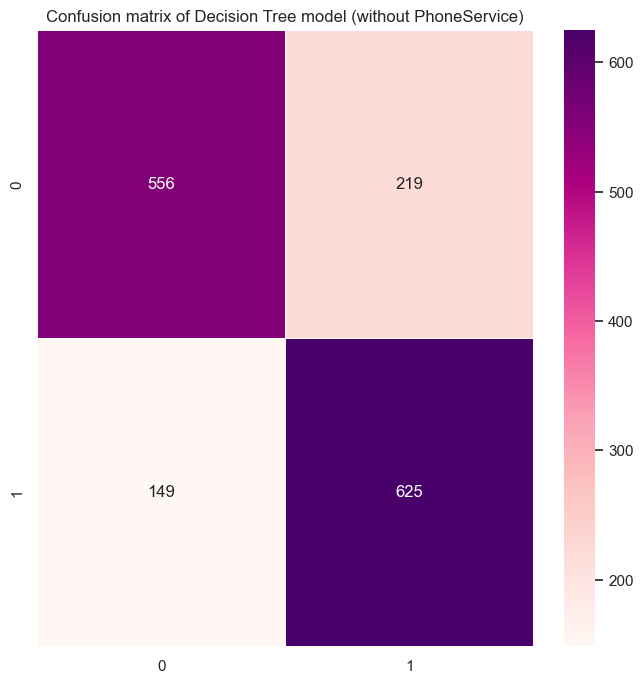

In [217]:
SmDT2 = confusion_matrix(SmDT2_true, SmDT2_pred)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(sm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='RdPu',ax = ax)
plt.xlabel = ('SmDT2_pred')
plt.ylabel = ('SmDT2_true ')
plt.title('Confusion matrix of Decision Tree model (without PhoneService)')

In [117]:
smote_report = classification_report(sm1_y_test,SmDT2_pred, target_names= ["Stayed", "Churned"])
print(smote_report)

              precision    recall  f1-score   support

      Stayed       0.78      0.79      0.79       775
     Churned       0.79      0.78      0.79       774

    accuracy                           0.79      1549
   macro avg       0.79      0.79      0.79      1549
weighted avg       0.79      0.79      0.79      1549



In [118]:
fbeta_score(y_true, SmDT2_pred, average='binary', beta= 0.9)
print(f"F-beta score: {fbeta}")

F-beta score: 0.867630208711039


The decision tree model's performance, as indicated by the F2 score, F1-score, and confusion matrix, remained the same even after dropping the phone services column.

The F2 score and F1-score remained at 0.79, indicating that the model's ability to correctly predict the positive class (churned customers) and balance precision and recall did not change significantly.

The confusion matrix, which shows the counts of true positives, true negatives, false positives, and false negatives, also remained the same. This suggests that the model's predictions for churned and non-churned customers did not change after dropping the phone services column.

# RANDOM FOREST MODEL (without PhoneService)

In [119]:
rf2_smote = RandomForestClassifier(random_state = 24)
rf2_smote = rf2_smote.fit(sm1_X_train, sm1_y_train)

In [120]:
## Feature Importance of the Random Forest Model
rf2_importance = rf2_smote.feature_importances_
rf2_importance = pd.DataFrame(rf2_importance, columns = ["score"]).reset_index()
rf2_importance["Feature"] = list(X.columns)
rf2_importance.drop(columns = ["index"], inplace = True)
rf2_importance.sort_values(by = "score", ascending = False, ignore_index = True, inplace = True)
## Visualizing the feature importances
fig = px.bar(rf2_importance, x = "Feature", y = "score")
fig.show()


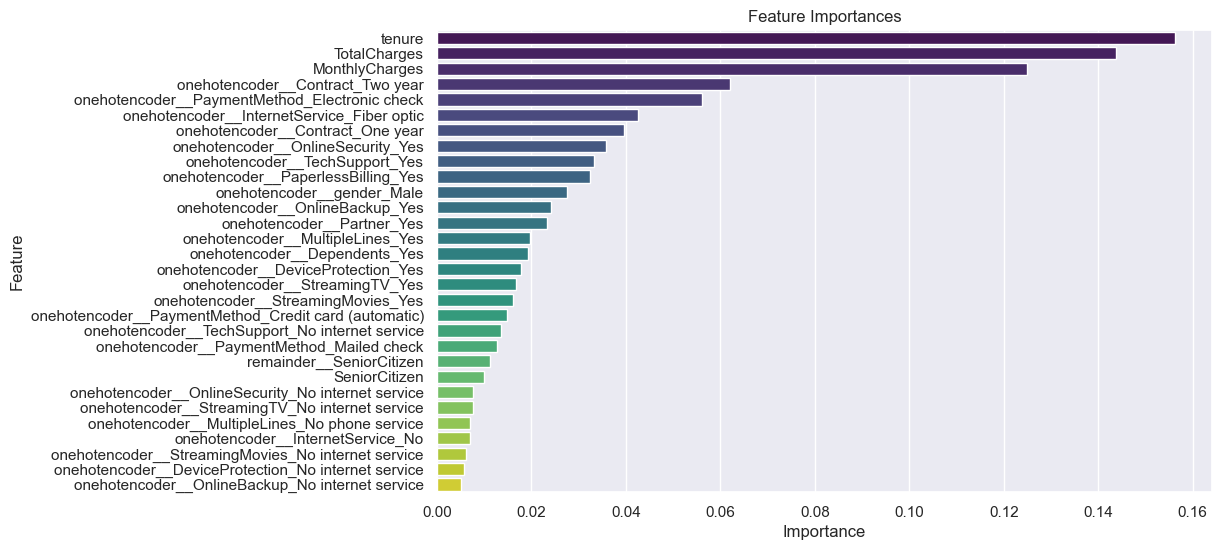

In [121]:
# Feature Importance of the Random Forest Model
rf2_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf2_smote.feature_importances_})
rf2_importance = rf2_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf2_importance, palette='viridis')
plt.title('Feature Importances')
plt.show()

In [122]:
rf2smote_pred = rf2_smote.predict(sm1_X_test)
rf2_true = sm1_y_test

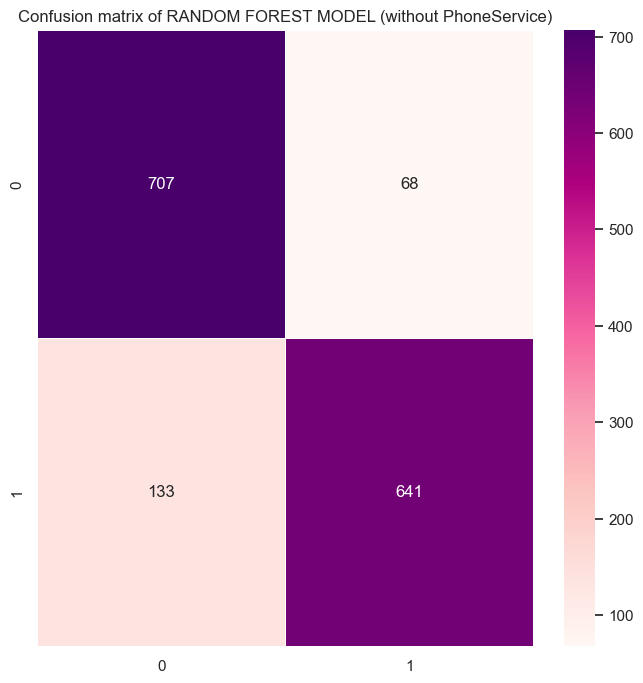

In [194]:
rf2smote = confusion_matrix(sm1_y_test,rf2smote_pred)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(rfsmote, annot=True, linewidth=0.5, fmt=".0f",cmap='RdPu',ax = ax)
plt.xlabel = ('rf2smote_pred')
plt.ylabel = ('rf2_true')
plt.title('Confusion matrix of RANDOM FOREST MODEL (without PhoneService)')
plt.show()


In [124]:
# Evaluating the model
smote_report = classification_report(sm1_y_test,rf2smote_pred, target_names= ["Stayed", "Churned"])
print(smote_report)

              precision    recall  f1-score   support

      Stayed       0.86      0.87      0.87       775
     Churned       0.87      0.86      0.87       774

    accuracy                           0.87      1549
   macro avg       0.87      0.87      0.87      1549
weighted avg       0.87      0.87      0.87      1549



In [125]:
fbeta_score(y_true, rf2smote_pred, average='binary', beta= 0.9)
print(f"F-beta score: {fbeta}")

F-beta score: 0.867630208711039


The decision tree model's performance, as indicated by the F2 score, F1-score, and confusion matrix, remained the same even after dropping the phone services column.

The F2 score and F1-score remained at 0.86, indicating that the model's ability to correctly predict the positive class (churned customers) and balance precision and recall did not change significantly.

The confusion matrix, which shows the counts of true positives, true negatives, false positives, and false negatives, also remained the same. This suggests that the model's predictions for churned and non-churned customers did not change after dropping the phone services column.

# AdaBoost Model (without PhoneService)

In [126]:
ADAB_model = AdaBoostClassifier()
ADAB_model .fit(sm1_X_train, sm1_y_train)

AdaBoostClassifier()

In [127]:
ADAB_model_pred =ADAB_model .predict(sm1_X_test)
ADAB_model_true = sm1_y_test

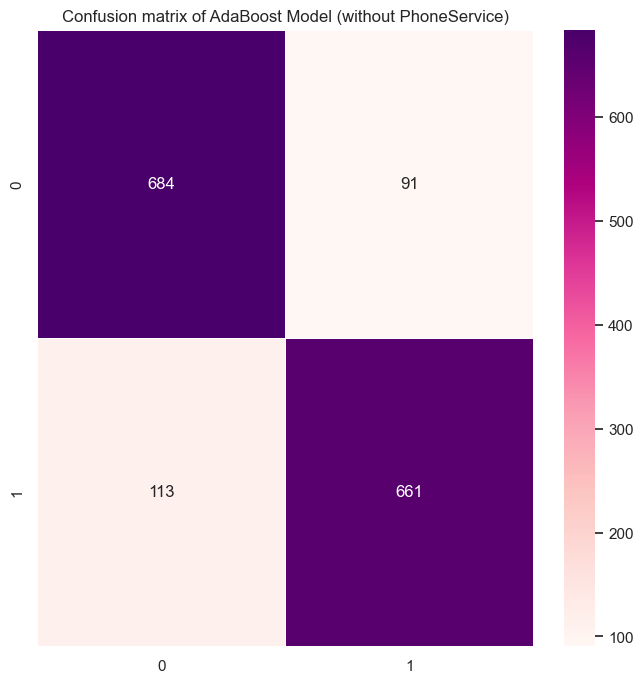

In [195]:
ADABsmote = confusion_matrix(sm1_y_test,ADAB_pred)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(ADABsmote, annot=True, linewidth=0.5, fmt=".0f",cmap='RdPu',ax = ax)
plt.xlabel = ('ADAB_model_pred')
plt.ylabel = ('ADAB_model_true')
plt.title('Confusion matrix of AdaBoost Model (without PhoneService)')
plt.show()


In [129]:
# Evaluating the model
smote_report = classification_report(sm1_y_test,ADAB_model_pred, target_names= ["Stayed", "Churned"])
print(smote_report)

              precision    recall  f1-score   support

      Stayed       0.86      0.82      0.84       775
     Churned       0.83      0.87      0.85       774

    accuracy                           0.84      1549
   macro avg       0.84      0.84      0.84      1549
weighted avg       0.84      0.84      0.84      1549



In [130]:
fbeta_score(y_true, ADAB_model_pred, average='binary', beta= 0.9)
print(f"F-beta score: {fbeta}")

F-beta score: 0.867630208711039


The performance of the Adaboost model remained relatively stable even after removing a column with a high Variance Inflation Factor.

# K-NEAREST Neighbor( without PhoneService)

In [131]:
knn2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
SMknn2_model = knn2.fit(sm1_X_train, sm1_y_train)


In [132]:
knn2_pred =knn2.predict(sm1_X_test)
knn2_true = sm1_y_test

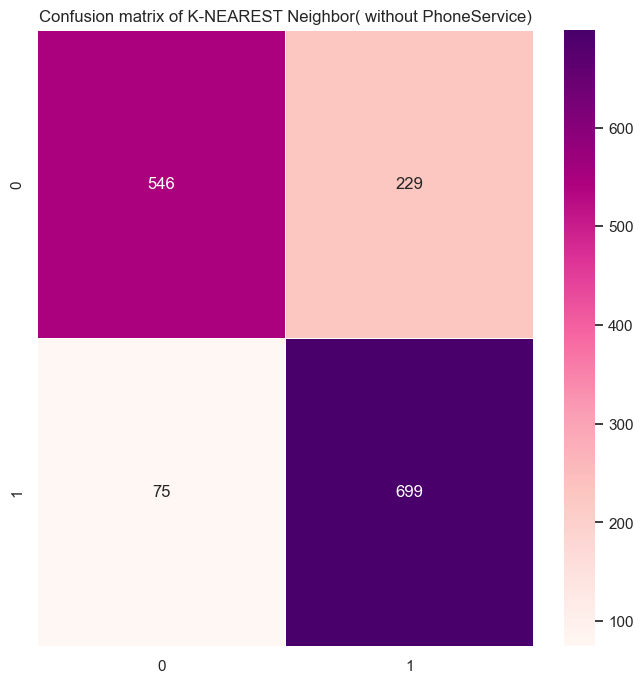

In [196]:
sm_knn2 = confusion_matrix(knn2_true,knn2_pred)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(sm_knn2, annot=True, linewidth=0.5, fmt=".0f",cmap='RdPu',ax = ax)
plt.xlabel = ('knn2_pred')
plt.ylabel = ('knn2_true')
plt.title('Confusion matrix of K-NEAREST Neighbor( without PhoneService)')
plt.show()

In [134]:
smote_report = classification_report(sm1_y_test,knn2_pred, target_names= ["Stayed", "Churned"])
print(smote_report)

              precision    recall  f1-score   support

      Stayed       0.88      0.70      0.78       775
     Churned       0.75      0.90      0.82       774

    accuracy                           0.80      1549
   macro avg       0.82      0.80      0.80      1549
weighted avg       0.82      0.80      0.80      1549



In [135]:
fbeta_score(y_true, knn2_pred, average='binary', beta= 0.9)
print(f"F-beta score: {fbeta}")

F-beta score: 0.867630208711039


After removing the phone services column, the performance of the K-Nearest Neighbors model showed a slight decrease. The number of correctly predicted negative and positive cases decreased, while the number of false positives and false negatives increased. The precision and F1-score for the not-churned class decreased, indicating a lower ability to accurately identify non-churned customers. However, the recall for the not-churned class remained the same. Similarly, the recall and F1-score for the churned class also decreased, indicating a lower ability to correctly identify churned customers, while the precision decreased slightly. Overall, the accuracy and F2-score of the model also decreased, indicating a slightly reduced performance in predicting churn.

# Logistic Regression( without PhoneServices)

In [136]:
log_reg2 = LogisticRegression()
log_reg2_model = log_reg2.fit(sm1_X_train, sm1_y_train)

In [137]:
## Feature Importance of the Random Forest Model
log_reg2_importance = log_reg2_model.coef_[0]
log_reg2_importance = pd.DataFrame(log_reg2_importance, index = X.columns)
log_reg2_importance.reset_index(inplace = True)
log_reg2_importance.rename(columns = {"index": "Feature", 0:"Score"}, inplace = True)
log_reg2_importance.sort_values(by = "Score", ascending = False, inplace = True)
log_reg2_importance

fig = px.bar(log_reg2_importance, x = "Feature", y = "Score")
fig.show()

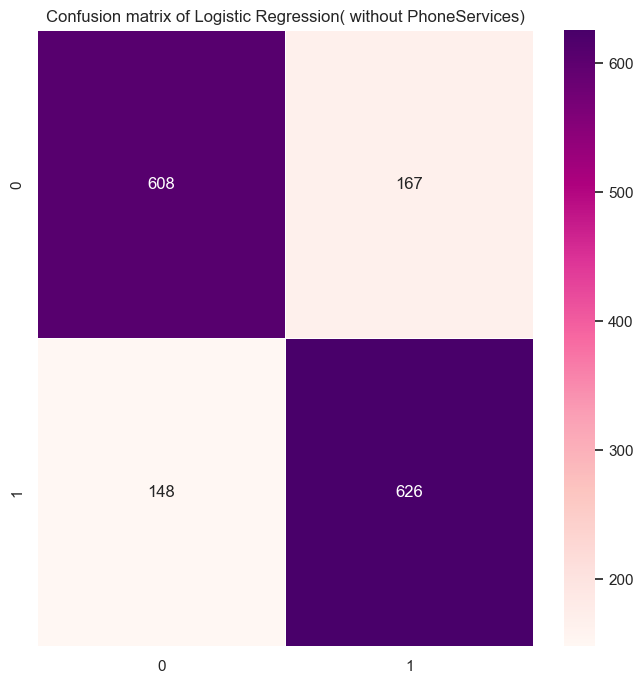

In [197]:
log_pred = log_reg2.predict(sm1_X_test)
log_true = sm1_y_test
log_reg = confusion_matrix(log_true,log_pred)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm_lr, annot=True, linewidth=0.5, fmt=".0f",cmap='RdPu',ax = ax)
plt.xlabel = ('log_reg_pred')
plt.ylabel = ('log_reg_true')
plt.title('Confusion matrix of Logistic Regression( without PhoneServices)')
plt.show()

In [139]:
fbeta_score(log_true, log_pred, average='binary', beta= 0.9)
print(f"F-beta score: {fbeta}")

F-beta score: 0.867630208711039


The logistic regression model's performance remained largely unchanged, with a slight decrease in precision for the not-churned variable and recall for the churned variable. However, the other evaluation metrics showed no significant changes.

# Hyperparameter Tuning and Cross Validation on the Random Forest

Hyperparameter tuning is the process of finding the best values for the hyperparameters of a machine learning model. Hyperparameters are parameters that are not learned from the data but are set by the user before training the model. They control the behavior and performance of the model during training and can have a significant impact on its accuracy and generalization ability.In the context of the Adaboost model, hyperparameter tuning involves determining the optimal number of decision trees to improve the accuracy of predictions on the test set. Techniques like grid search and randomized CV are employed to explore various combinations of hyperparameter values and identify the configuration that yields the best model performance.

Cross-validation is a method used to assess the generalization ability of a model by evaluating its performance on independent datasets. It involves dividing the available data into multiple subsets, training the model on a subset, and evaluating it on the remaining data. This approach helps detect issues like overfitting or selection biases, providing insights into how well the model will perform in real-world scenarios.

By employing cross-validation, we can obtain a more comprehensive evaluation of the model's performance and address any potential challenges before deploying it. It ensures that the model's performance is robust and reliable, enabling us to make informed decisions about its suitability for practical applications

Random forest being the best model would be tuned using the randomised search CV and the Grid Search CV to find it best parameters and also view its ability to generalise on unseen data

### Randomised Search CV

In [140]:
n_estimators = list(range(10, 101, 10))
# Defining the values and instantiating the grid to be used in the RandomizedSearch
random_grid = {
    "n_estimators": n_estimators,
    "max_depth": [1, 5, 10, 20, 50, 75, 100, 150, 200],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
    "max_features": ["sqrt", "log2", None],
    "random_state": [24]
}


# Running the RandomizedSearch Cross-Validation with the grid
rf_rscv = RandomizedSearchCV(estimator= rf_smote,
                             param_distributions= random_grid,
                             n_iter= 30,
                             cv= 10,
                             random_state= 24,
                             n_jobs= 5)
rf_rscv.fit(sm_X_train, sm_y_train)


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=24),
                   n_iter=30, n_jobs=5,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 50, 75, 100,
                                                      150, 200],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100],
                                        'random_state': [24]},
                   random_state=24)

In [141]:
# Looking at the best combination of hyperparameters for the model
best_params = rf_rscv.best_params_
print("The best combination of hyperparameters for the model will be:")

for param_name in sorted(best_params.keys()):
    print(f"{param_name}: {best_params[param_name]}")

The best combination of hyperparameters for the model will be:
bootstrap: True
criterion: gini
max_depth: 10
max_features: log2
n_estimators: 80
random_state: 24


In [142]:
# Defining the best version of the model with the best grid search parameters
best_gridrf_model = RandomForestClassifier(bootstrap = False,
                                       criterion= "gini",
                                       max_depth= 150,
                                       max_features= "log2",
                                       n_estimators= 100,
                                       random_state= 24)
                                      
# Fitting the model to the training data
best_gridrf_model = best_gridrf_model.fit(sm_X_train, sm_y_train)

In [143]:
# Defining the best version of the model with the best parameters
best_rf_model = RandomForestClassifier(bootstrap = True,
                                       criterion= "entropy",
                                       max_depth= 20,
                                       max_features= "log2",
                                       n_estimators= 100,
                                       random_state= 24)
                                      
# Fitting the model to the training data
best_rf_model = best_rf_model.fit(sm_X_train, sm_y_train)


In [144]:
# Predicting the test data
best_rf_pred = best_rf_model.predict(sm_X_test)





# Evaluating the model
best_rf_report = classification_report(sm_y_test, best_rf_pred, target_names=["Stayed", "Churned"])
print(best_rf_report)

              precision    recall  f1-score   support

      Stayed       0.85      0.90      0.87       775
     Churned       0.89      0.84      0.86       774

    accuracy                           0.87      1549
   macro avg       0.87      0.87      0.87      1549
weighted avg       0.87      0.87      0.87      1549



In [145]:
rf_rscv.best_score_
rf_rscv.score(sm_X_train, sm_y_train)

0.9070217917675545

In [146]:
# Calculating the accuracy score
accuracy = accuracy_score(sm_y_test, best_rf_pred)
accuracy = "{:.5f}".format(accuracy)
print("Accuracy:", accuracy)

# Calculating the F2 Score
f2_score = fbeta_score(sm_y_test, best_rf_pred, beta= 0.5)
f2_score = "{:.5f}".format(f2_score)
print("F2 Score:", f2_score)

Accuracy: 0.86895
F2 Score: 0.88243


In [147]:
# Confusion Matrix
best_rf_conf_mat = confusion_matrix(sm_y_test, best_rf_pred)
best_rf_conf_mat = (pd.DataFrame(best_rf_conf_mat).reset_index(drop=True)).rename(columns={0: "Stayed", 1: "Churned"})
best_rf_conf_mat

,Stayed,Churned
0,699,76
1,127,647


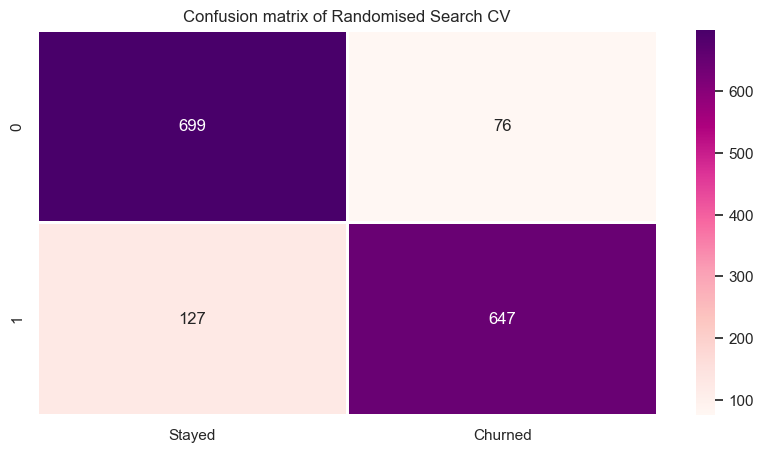

In [198]:
# Visualizing the Confusion Matrix
f, ax = plt.subplots()
sns.heatmap(best_rf_conf_mat,
            annot= True,
            linewidth= 1.0,
            fmt= ".0f",
            cmap= "RdPu",
            ax= ax)
plt.title('Confusion matrix of Randomised Search CV')
plt.show()

In [149]:
# Cross-validating the scores of the best model
final_cv_score = cross_val_score(best_rf_model,
                                sm_X_train, sm_y_train,
                                 cv= 10).mean()
final_cv_score = "{0:.5}".format(final_cv_score)



print("Average score of the model on cross-validation is:", final_cv_score)

Average score of the model on cross-validation is: 0.85843


# GRID Search CV

In [150]:
list(range(100, 1000, 300))


[100, 400, 700]

In [151]:
# Gridsearch CV
gscv_param_grid = {
    "n_estimators": list(range(100, 1000, 300)),
    "max_features": ["sqrt", "log2"],
    "max_depth": [150, 200, 300],
    "criterion": ["gini"],
    "random_state": [24],
    "bootstrap": [True, False],} 


In [152]:
# Gridsearch CV
gscv_param_grid = {
    "n_estimators": list(range(100, 1000, 300)),
    "max_features": ["sqrt", "log2"],
    "max_depth": [150, 200, 300],
    "criterion": ["gini"],
    "random_state": [24],
    "bootstrap": [True, False],}


In [153]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestClassifier

# Define your RandomForestClassifier or rf_smote object
#rf_smote = RandomForestClassifier()

# Define your parameter grid for grid search
#gscv_param_grid = {
  #  "n_estimators": [10, 50, 100],
   # "max_depth": [5, 10, 20],
    #"bootstrap": [True, False]
#}

# Replace sm_X_train and sm_y_train with your actual training data
#sm_X_train = ...  # Replace with your training features
#sm_y_train = ...  # Replace with your training labels

# Redefining the classifier and executing GridSearchCV
rf_gscv = GridSearchCV(estimator=rf_smote,
                       param_grid=gscv_param_grid,
                       n_jobs=-1,
                       cv=5)

# Fitting the model to the training data
rf_gscv.fit(sm_X_train, sm_y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=24), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'criterion': ['gini'],
                         'max_depth': [150, 200, 300],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 400, 700],
                         'random_state': [24]})

In [154]:
# Looking at the best combination of hyperparameters for the model
best_params = rf_gscv.best_params_
print("The best combination of hyperparameters for the model will be:")
for param_name in sorted(best_params.keys()):
    print(f"{param_name}: {best_params[param_name]}")

The best combination of hyperparameters for the model will be:
bootstrap: True
criterion: gini
max_depth: 150
max_features: log2
n_estimators: 400
random_state: 24


In [155]:
# Defining the best version of the model with the best grid search parameters
best_gridrf_model = RandomForestClassifier(bootstrap = False,
                                       criterion= "gini",
                                       max_depth= 150,
                                       max_features= "log2",
                                       n_estimators= 100,
                                       random_state= 24)
                                      
# Fitting the model to the training data
best_gridrf_model = best_gridrf_model.fit(sm_X_train, sm_y_train)

In [156]:
# Predicting the test data
best_gridrf_pred = best_gridrf_model.predict(sm_X_test)

# Evaluating the model
best_gridrf_report = classification_report(sm_y_test, best_rf_pred, target_names=["Stayed", "Churned"])
print(best_gridrf_report)

              precision    recall  f1-score   support

      Stayed       0.85      0.90      0.87       775
     Churned       0.89      0.84      0.86       774

    accuracy                           0.87      1549
   macro avg       0.87      0.87      0.87      1549
weighted avg       0.87      0.87      0.87      1549



In [157]:
rf_gscv.best_score_
rf_gscv.score(sm_X_train, sm_y_train)

0.9988700564971752

In [158]:
# Calculating the accuracy score
accuracy = accuracy_score(sm_y_test, best_gridrf_pred)
accuracy = "{:.5f}".format(accuracy)
print("Accuracy:", accuracy)

# Calculating the F2 Score
f2_score = fbeta_score(sm_y_test, best_gridrf_pred, beta= 0.5)
f2_score = "{:.5f}".format(f2_score)
print("F2 Score:", f2_score)

Accuracy: 0.86572
F2 Score: 0.88382


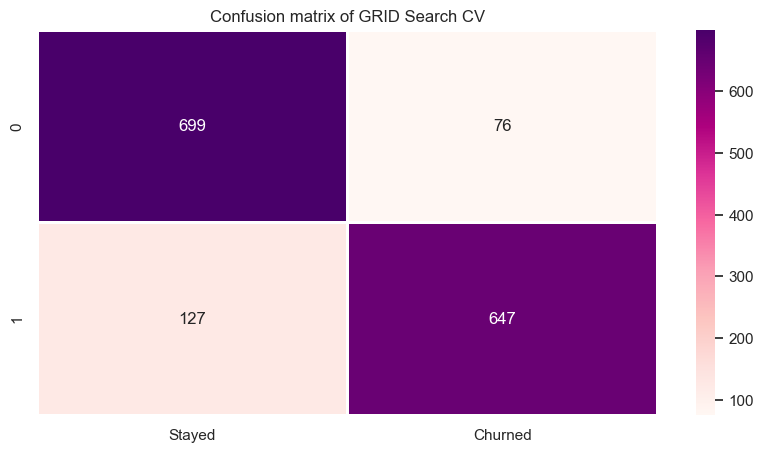

In [199]:
# Confusion Matrix
best_gridrf_conf_mat = confusion_matrix(sm_y_test, best_gridrf_pred)
best_gridrf_conf_mat = (pd.DataFrame(best_gridrf_conf_mat).reset_index(drop=True)).rename(columns={0: "Stayed", 1: "Churned"})
best_gridrf_conf_mat


# Visualizing the Confusion Matrix
f, ax = plt.subplots()
sns.heatmap(best_rf_conf_mat,
            annot= True,
            linewidth= 1.0,
            fmt= ".0f",
            cmap= "RdPu",
            ax= ax)
plt.title('Confusion matrix of GRID Search CV')
plt.show()

### PREDICTION WITH UNBALANCED TEST SET

The test data from the previous spilt would be used for the prediction with the best performing model.

In [200]:
scaled_test_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,...,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,Churn
4712,1,0.887324,0.833583,0.770687,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
5934,0,0.000000,0.661169,0.007610,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
6163,0,0.126761,0.513743,0.074034,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
5758,0,0.901408,0.410795,0.437883,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0
212,0,0.845070,0.010495,0.127718,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1,0.197183,0.668666,0.153297,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
495,0,0.380282,0.421789,0.204156,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2063,0,0.647887,0.820090,0.537381,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3266,1,0.154930,0.826087,0.138621,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1


In [201]:
X_test.shape

(1758, 31)

In [202]:
y_test.shape

(1758,)

In [203]:
# Predicting the test data
pred = best_gridrf_model.predict(X_test)

In [204]:
print("Accuracy for Random Forest on customer churn data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on customer churn data:  0.767349260523322


In [205]:
# Evaluating the model
best_rf_report = classification_report(
    y_test,pred, target_names=["Stayed","Churned"])
print(best_rf_report)

              precision    recall  f1-score   support

      Stayed       0.82      0.87      0.85      1291
     Churned       0.57      0.48      0.52       467

    accuracy                           0.77      1758
   macro avg       0.70      0.68      0.68      1758
weighted avg       0.76      0.77      0.76      1758



In [206]:
# Calculating the F2 Score
f2_score = fbeta_score(y_test,pred, beta=0.5)
f2_score = "{:.5f}".format(f2_score)
print("F2 Score:", f2_score)


F2 Score: 0.55283


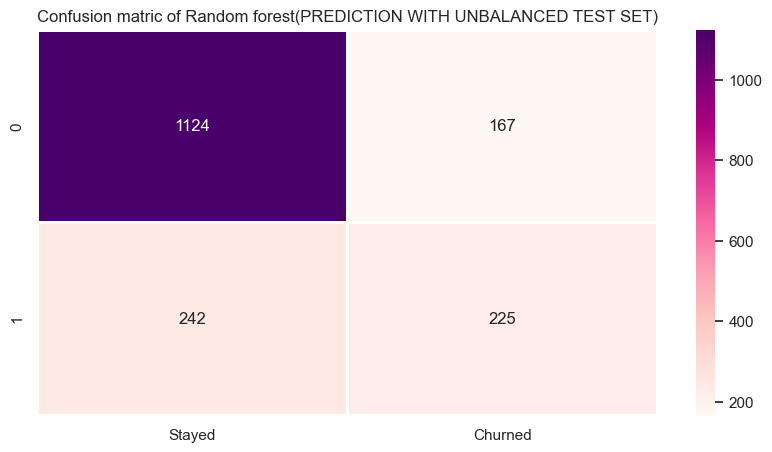

In [208]:
# Confusion Matrix
best_rf_conf_mat = confusion_matrix(y_test,pred)
best_rf_conf_mat = (pd.DataFrame(best_rf_conf_mat).reset_index(
    drop=True)).rename(columns={0: "Stayed", 1: "Churned"})
best_rf_conf_mat



# Visualizing the Confusion Matrix
f, ax = plt.subplots()
sns.heatmap(best_rf_conf_mat,
            annot=True,
            linewidth=1.0,
            fmt=".0f",
            cmap="RdPu",
            ax=ax)
plt.title('Confusion matric of Random forest(PREDICTION WITH UNBALANCED TEST SET)')
plt.show()

### PREDICTION WITH A BALANCED TEST SET

In [210]:
# Defining the target & predictor variables
test_X = test_data.drop(columns=["Churn"])
test_y = test_data["Churn"]

In [211]:
smote2 = SMOTE(sampling_strategy='minority')
X_testsm, y_testsm = smote.fit_resample(test_X, test_y)

y_sm.value_counts()

0    3872
1    3872
Name: Churn, dtype: int64

In [212]:
# Predicting the test data
sm_pred = rf_smote.predict(X_testsm)

In [213]:
# Evaluating the model
smtest_report = classification_report(
    y_testsm,sm_pred, target_names=["Stayed","Churned"])
print(smtest_report)

              precision    recall  f1-score   support

      Stayed       0.81      0.87      0.84      1291
     Churned       0.86      0.80      0.83      1291

    accuracy                           0.83      2582
   macro avg       0.84      0.83      0.83      2582
weighted avg       0.84      0.83      0.83      2582



In [214]:
# Calculating the F2 Score
f2_score = fbeta_score(y_testsm,sm_pred, beta=0.5)
f2_score = "{:.5f}".format(f2_score)
print("F2 Score:", f2_score)

F2 Score: 0.84604


In [215]:
# Confusion Matrix
conf_mat = confusion_matrix(y_testsm,sm_pred)
conf_mat = (pd.DataFrame(conf_mat).reset_index(
    drop=True)).rename(columns={0: "Stayed", 1: "Churned"})
conf_mat

,Stayed,Churned
0,1121,170
1,259,1032


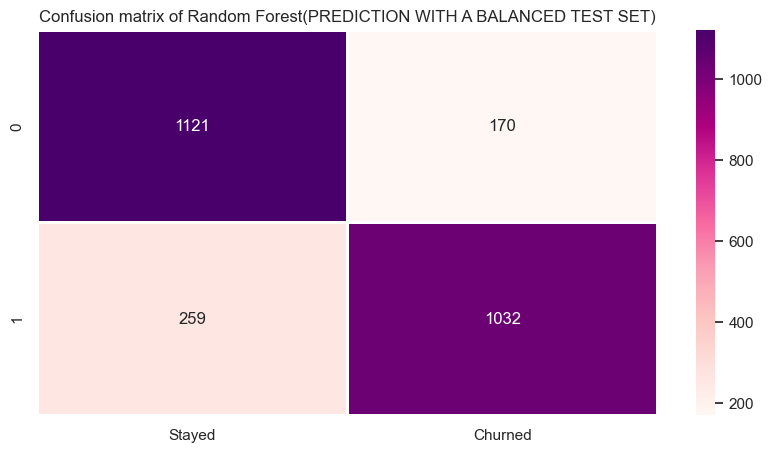

In [216]:
# Visualizing the Confusion Matrix
f, ax = plt.subplots()
sns.heatmap(conf_mat,
            annot=True,
            linewidth=1.0,
            fmt=".0f",
            cmap="RdPu",
            ax=ax)
plt.title('Confusion matrix of Random Forest(PREDICTION WITH A BALANCED TEST SET)')
plt.show()